Presented here are two methods for calculating Planck's constant. One uses Numpy while the other uses a basic linear Pytorch Model.

Let's start with the libraries used.

In [2]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.nn.init as init
import torch.utils.data as data
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch.utils.data import random_split
import torch.nn.utils.weight_norm as weight_norm
from torch.optim.lr_scheduler import StepLR

This is the numpy method.


y=3.40033543679573e-15x+-1.2313894255369477
Planck's constant: 5.440536698873168e-34 J*s


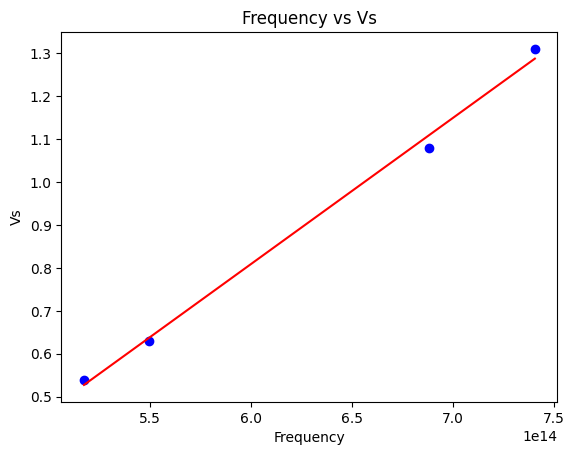

In [27]:
# Declaration of variables

wavelengthnm = [405, 436, 546, 580] # Wavelength in nanometers
wavelength = []
for x in wavelengthnm: # Converting wavelength in nanometers to wavelength in meters
    wavelength.append(x*(10**-9))
frequency = [300000000 / x for x in wavelength] # Calculating frequency using wavelength in meters

Vs = [1.31,1.08,0.63, 0.54] # Stopping Potential

thing = np.polyfit(frequency, Vs, 1) # Using polyfit to create the line of best fit
slope = thing[0]
y_intercept = thing[1]
line = np.poly1d(thing)

x_fit = np.linspace(min(frequency), max(frequency), 100)
y_fit = line(x_fit)


# Plotting values
plt.plot(x_fit, y_fit, color = 'red')
plt.scatter(frequency, Vs, color= 'blue', marker ='o')
plt.xlabel('Frequency')
plt.ylabel('Vs')
plt.title('Frequency vs Vs')
print("y="+str(slope)+"x+"+str(y_intercept))
numpy_planck_constant = slope * 1.6e-19
print("Planck's constant:", numpy_planck_constant, "J*s")

This is the Pytorch method.


LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Epoch: 0, Loss: 0.2453749030828476
Epoch: 100, Loss: 0.0028527372051030397
Epoch: 200, Loss: 0.002829307224601507
Epoch: 300, Loss: 0.0028293118812143803
Epoch: 400, Loss: 0.0028293118812143803
Epoch: 500, Loss: 0.0028293118812143803
Epoch: 600, Loss: 0.0028293118812143803
Epoch: 700, Loss: 0.0028293097857385874
Epoch: 800, Loss: 0.0028293097857385874
Epoch: 900, Loss: 0.0028293118812143803
Epoch: 1000, Loss: 0.0028293097857385874
Epoch: 1100, Loss: 0.002829310717061162
Epoch: 1200, Loss: 0.0028293088544160128
Epoch: 1300, Loss: 0.002829310717061162
Epoch: 1400, Loss: 0.002829310717061162
Epoch: 1500, Loss: 0.002829310717061162
Epoch: 1600, Loss: 0.0028293088544160128
Epoch: 1700, Loss: 0.002829310717061162
Epoch: 1800, Loss: 0.002829310717061162
Epoch: 1900, Loss: 0.0028293088544160128
Epoch: 2000, Loss: 0.0028293088544160128
Epoch: 2100, Loss: 0.0028293116483837366
Epoch: 2200, Loss: 0.0028293088544

Text(0, 0.5, 'Stopping Potential (V)')

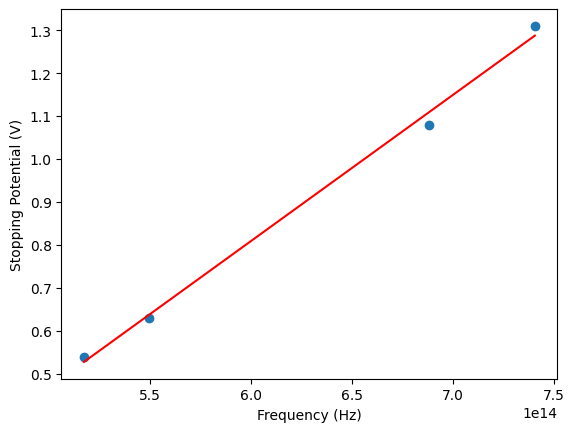

In [22]:
from typing_extensions import final
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.init as init

# Hyperparameters
n_epochs = 50000
learning_rate = 0.01

# Data, constants, and normalization
c = 300000000 # Speed of light in m/s
original_x_data = torch.tensor([[c / (405*10**-9)], [c / (436*10**-9)], [c / (546*10**-9)], [c / (580*10**-9)]], dtype=torch.float32) # Frequency

# Normalizing the x_data
x_mean = torch.mean(original_x_data)
x_std = torch.std(original_x_data)
x_data = (original_x_data - x_mean) / x_std


original_y_data = torch.tensor([[1.31], [1.08], [0.63], [0.54]]) # Stopping Potential

# Normalizing the y_data
y_mean = torch.mean(original_y_data)
y_std = torch.std(original_y_data)
y_data = (original_y_data - y_mean) / y_std

# Simple linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        x = self.linear(x)
        return x

# Training
model = LinearRegressionModel() # Initializing the model
print(model)
criterion = nn.MSELoss() # Criterion to calculate loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # Optimizer

for epoch in range(n_epochs):
    model.train() # Set the model into training mode

    # Forward pass
    outputs = model(x_data)  # Use original x_data directly
    loss = criterion(outputs, y_data)  # Use original y_data

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Printing loss for every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.item()}')

# Evaluation and Loss Calculation
model.eval()

# Plotting
with torch.no_grad():


    predictions = model(x_data)
    denormalized_predictions = predictions * y_std + y_mean # Denormalize predictions for plotting

# Final loss for the model
final_loss = loss.item()
print(f'Final Loss: {final_loss}')

# Plotting scatter plot and the line of best fit
plt.scatter(original_x_data, original_y_data, label='Data Points')  # Using original data for scatter plot
plt.plot(original_x_data, denormalized_predictions, color='red', label='Line of Best Fit')  # Use original x values vs. denormalized predictions for the line of best fit
plt.xlabel('Frequency (Hz)')  # Adjust x-axis label
plt.ylabel('Stopping Potential (V)')


In [28]:
# Calculating the slope and y intercept
numerator = torch.sum((original_x_data - x_mean) * (denormalized_predictions - torch.mean(denormalized_predictions)))
denominator = torch.sum((original_x_data - x_mean)**2)
slope = numerator / denominator
intercept = torch.mean(denormalized_predictions) - slope * torch.mean(original_x_data)
print("y="+str(slope.numpy())+"x+"+str(intercept.numpy()))

y=3.4005764e-15x+-1.2315409


In [29]:
# Calculating predicted planck constant

planck_constant = slope * 1.6e-19
print("Planck's constant:", planck_constant.numpy(), "J*s")

Planck's constant: 5.440922e-34 J*s


In [30]:
# True planck constant and ideal slope from the model predictions

true_planck = 6.626e-34
print("True Planck's constant:", true_planck, "J*s")

reversal = true_planck / 1.6e-19
print("Ideal slope from model predictions:",reversal)

True Planck's constant: 6.626e-34 J*s
Ideal slope from model predictions: 4.14125e-15


As you can see, we're in the ball park for the Planck constant, but there is still some error involved. This could be due to the data collected as well as any factors associated with the model.

Try to see if you can improve the model in some way so that the slope gets closer to the ideal slope.